# Plotting Fisher predictions for $\Delta\alpha$ against numerical simulations

Import packages.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import arviz as az
from sympy.parsing import mathematica as M


%matplotlib inline
np.random.seed(1234)

az.style.use("arviz-darkgrid")

# Nice plotting options.

params = {'axes.labelsize': 14,
          'font.size': 14,
          'axes.linewidth': 1,
          'legend.fontsize': 11,
          'xtick.labelsize': 14,
          'xtick.top': True,
          'ytick.labelsize': 14,
          'ytick.right': True,
          'axes.grid' : True,
          'savefig.dpi' : 100,
          'lines.markersize' : 4,
          'axes.formatter.limits' : (-3,3)}

mpl.rcParams.update(params)

# LaTeX rendering.

from matplotlib import rc
rc('text', usetex=True)

For this exercise, we use the expression for $\Delta\alpha$ obtained retaining the first term in the integral only, when no selection effects are present.

In [3]:
from sympy.parsing import mathematica as M
Dalpha_simpified = M.mathematica('Sqrt[1/(Nobs*(alpha^(-2) - (Mmax^alpha*Mmin^alpha*(Log[Mmax] - Log[Mmin])^2)/(Mmax^alpha - Mmin^alpha)^2))]')

def Dalpha(Nobs,alpha,Mmin,Mmax):
    
    out = Dalpha_simpified.subs([('Nobs',Nobs),('alpha',alpha),('Mmax',Mmax),('Mmin',Mmin)]).evalf()
    
    return float(out)

print('Analytical expression for the variance on the spectral index:')
Dalpha_simpified

Analytical expression for the variance on the spectral index:


sqrt(1/(Nobs*(-Mmax**alpha*Mmin**alpha*(log(Mmax) - log(Mmin))**2/(Mmax**alpha - Mmin**alpha)**2 + alpha**(-2))))

We define some true parameters that we need in the analytical expression above.

In [4]:
"""
Parameters
"""

# Inputs to get the true ln M distribution.
# Notice that M runs from 10^4 to 10^7 in GTV.

alpha0_t = 0.00001 # Choose flat spectral profile.
M_min=10000. 
M_max=10000000.

We create a list of $\Delta\alpha$ as a function of $N_\text{obs}$

In [5]:
# List without selection effects.

Da_list =[]
for N in range(1,110):
    Da_list.append(Dalpha(N,alpha0_t,M_min,M_max))
    
# List with selection effects.

Da_list_sel =[]
for N_det in range(1,110):
    Da_list_sel.append(np.sqrt(106/(N_det*86.39531326294203)))

We plot this against a scatter plot of widths obtained through MCMC analyses in the case without selection effects.


The MCMC results without selection effects come from [this code](https://github.com/aantonelli94/PopFisher/blob/main/GW_like_examples/tutorial_EMRI_mass_function_no_selectioneffects.ipynb).

The MCMC results with selection effects come from [this other code](https://github.com/aantonelli94/PopFisher/blob/main/GW_like_examples/EMRI_mass_function_with_selectioneffects.ipynb).

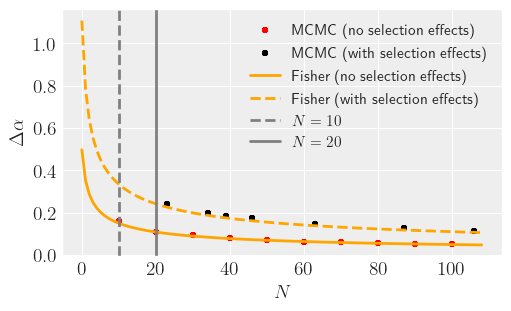

In [33]:
# Obtained without selection effects with tutorial code.
N_mcmc_nosel = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
widths_mcmc_nosel = [0.16086199517143002, 0.1098834936814631, 0.09283415521246546, 0.08025321201940053, 0.07209979572140537, 0.0618071927857337, 0.0610174386988298, 0.05645250676195151, 0.052183028854714396,  0.05063649210478289]

"""
Non convergent runs:

N_det_sel = [1, 2, 3, 4, 5, 6, 7, 8, 9]
widths_det_sel = [0.6644635195625176, 0.4241413342171043, 0.31524169596667206, 0.2738077487796176, 0.2564915824737737, 0.23475584261784793, 0.22054742341735029, 0.19752499334909973, 0.1757346577603143]
"""

# Obtained with selection effects.

N_det_sel = [23, 34, 39, 46, 63, 87, 106]
widths_det_sel = [0.2418621186948156, 0.1974904356207184, 0.18642049756792856, 0.17326842742425752, 0.14698104815678012, 0.12609283240058017, 0.11159709023169541]

"""
Non convergent runs:

N_det_sel = [9, 12, 14, 17]
widths_det_sel = [0.1158629812143967, 0.16608661959123255, 0.13194114216641284, 0.198499020496123]
"""

## Plot

fig, ax = plt.subplots(1,1,figsize=(5,3))

# MCMC results
plt.scatter(N_mcmc_nosel,widths_mcmc_nosel,c='red', marker='+', lw=3, label='MCMC (no selection effects)')
plt.scatter(N_det_sel,widths_det_sel,c='black', marker='+', lw=3, label='MCMC (with selection effects)')

# Fisher predictions
plt.plot(Da_list,c='orange',lw=2, label='Fisher (no selection effects)')
plt.plot(Da_list_sel,c='orange', ls='--',lw=2, label='Fisher (with selection effects)')

# Vertical lines
plt.axvline(x=10., label='$N=10$', c='gray',ls='--',lw=2)
plt.axvline(x=20., label='$N=20$', c='gray',ls='-',lw=2)

plt.xlabel('$N$')
plt.ylabel('$\Delta\\alpha$')
plt.legend(loc='best')

#plt.savefig('Da_vs_N.pdf')

We note that the Fisher prediction agrees remarkably well for sufficiently high observations $N\geq 10$ without selection effects, even if we are only retaining the first term in the Fisher matrix. 

A similar level of agreement is there also in the case with selection effects.